In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd

In [43]:

df_test=pd.read_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/TEST/cv-valid-test.csv')
df_test

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,NaN,NaN,NaN,NaN
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN
2,cv-valid-test/sample-000002.mp3,and you know it,1,0,NaN,NaN,NaN,NaN
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,1,0,NaN,NaN,NaN,NaN
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,2,1,NaN,NaN,NaN,NaN
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,3,0,NaN,NaN,NaN,NaN
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,3,0,NaN,NaN,NaN,NaN


In [44]:
df_train=pd.read_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/Training/train.csv')
df_train

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14996,cv-valid-train/sample-014996.mp3,we speak of them only to children,4,0,NaN,NaN,NaN,NaN
14997,cv-valid-train/sample-014997.mp3,its been a long time since she last read chekh...,1,0,NaN,NaN,NaN,NaN
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,NaN
14999,cv-valid-train/sample-014999.mp3,yeah better if people are already familiar wit...,1,0,NaN,NaN,NaN,NaN


In [45]:
df_train['age'].unique()

array([nan, 'twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [46]:
age_groups = {
    'twenties': 20,
    'thirties' : 30,
    'fourties' : 40,
    'fifties' : 50,
    'sixties' : 60,
    'seventies' : 70,
    'eighties' : 80,
    'teens': 18
}

In [47]:
df_train['gender'].unique()

array([nan, 'female', 'male', 'other'], dtype=object)

In [48]:
g={'male':2 , 'female':1 , 'other':0}

In [49]:
df_train['age']=df_train['age'].map(age_groups)
df_train['gender']=df_train['gender'].map(g)
df_train.dropna(axis=1, how='all', inplace=True)
df_train.dropna(inplace=True)
df_train.drop('accent',axis=1,inplace=True)
df_train = df_train.reset_index(drop=True)
df_train

,filename,text,up_votes,down_votes,age,gender
0,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,20.0,1.0
1,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,70.0,2.0
2,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,30.0,1.0
3,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,60.0,2.0
4,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,50.0,2.0
...,...,...,...,...,...,...
4817,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,40.0,2.0
4818,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,30.0,1.0
4819,cv-valid-train/sample-014995.mp3,i'm afraid i already know a great many people,2,0,30.0,2.0
4820,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,40.0,2.0


In [50]:

df_test=pd.read_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/TEST/cv-valid-test.csv')
df_test

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,NaN,NaN,NaN,NaN
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN
2,cv-valid-test/sample-000002.mp3,and you know it,1,0,NaN,NaN,NaN,NaN
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,1,0,NaN,NaN,NaN,NaN
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,2,1,NaN,NaN,NaN,NaN
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,3,0,NaN,NaN,NaN,NaN
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,3,0,NaN,NaN,NaN,NaN


In [51]:
df_test['age'].unique()

array([nan, 'twenties', 'thirties', 'fifties', 'fourties', 'teens',
       'seventies', 'sixties', 'eighties'], dtype=object)

In [52]:
df_test['gender'].unique()



array([nan, 'male', 'female', 'other'], dtype=object)

In [53]:
df_test['age']=df_test['age'].map(age_groups)
df_test['gender']=df_test['gender'].map(g)
df_test.dropna(axis=1, how='all', inplace=True)
df_test.dropna(inplace=True)
df_test.drop('accent',axis=1,inplace=True)
df_test = df_test.reset_index(drop=True)
df_test

,filename,text,up_votes,down_votes,age,gender
0,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,20.0,2.0
1,cv-valid-test/sample-000005.mp3,down below in the darkness were hundreds of pe...,4,1,20.0,2.0
2,cv-valid-test/sample-000008.mp3,this was the strangest of all things that ever...,1,0,30.0,2.0
3,cv-valid-test/sample-000009.mp3,it was glaringly hot not a cloud in the sky no...,3,0,50.0,2.0
4,cv-valid-test/sample-000014.mp3,follow the instructions here,1,0,20.0,2.0
...,...,...,...,...,...,...
1315,cv-valid-test/sample-003971.mp3,he's on my phone,1,0,18.0,2.0
1316,cv-valid-test/sample-003975.mp3,the planet's core is made of solid gold but ev...,1,0,20.0,2.0
1317,cv-valid-test/sample-003976.mp3,we've got her located,1,0,30.0,2.0
1318,cv-valid-test/sample-003980.mp3,i've got to see nicole right away,1,0,50.0,2.0


In [58]:
df_test.to_csv('Test_filtered.csv')
df_train.to_csv('Train_filtered.csv')


In [64]:
# import os
# import pandas as pd

# folder_path = '/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/TEST/cv-valid-test'
# all_files_in_folder = os.listdir(folder_path)

# # Extract the filenames from the df_test DataFrame (remove folder path part)
# df_filenames = df_test['filename'].apply(lambda x: os.path.basename(x))

# # Filter out files that are not mentioned in the DataFrame
# filtered_files = [file for file in all_files_in_folder if file in df_filenames.values]

# print("Filtered files:", filtered_files)


In [61]:
import os
import shutil
import pandas as pd

source_folder = '/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/TEST/cv-valid-test'
destination_folder = 'filtered_test'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Extract the filenames from the DataFrame (ignoring folder paths)
df_filenames = df_test['filename'].apply(lambda x: os.path.basename(x))

# Get all files in the source folder
all_files_in_folder = os.listdir(source_folder)

# Filter files that are in the DataFrame
filtered_files = [file for file in all_files_in_folder if file in df_filenames.values]

# Move each filtered file to the destination folder
for file in filtered_files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(destination_folder, file)
    
    # Move the file
    shutil.move(source_path, destination_path)

print(f"Filtered files have been moved to {destination_folder}.")


Filtered files have been moved to filtered_test.


In [62]:
import os
import shutil
import pandas as pd

source_folder = '/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/Training/cv-valid-train'
destination_folder = 'filtered_train'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Extract the filenames from the DataFrame (ignoring folder paths)
df_filenames = df_train['filename'].apply(lambda x: os.path.basename(x))

# Get all files in the source folder
all_files_in_folder = os.listdir(source_folder)

# Filter files that are in the DataFrame
filtered_files = [file for file in all_files_in_folder if file in df_filenames.values]

# Move each filtered file to the destination folder
for file in filtered_files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(destination_folder, file)
    
    # Move the file
    shutil.move(source_path, destination_path)

print(f"Filtered files have been moved to {destination_folder}.")


Filtered files have been moved to filtered_train.


In [66]:
# !pip install librosa praat-parselmouth numpy scipy pydub


In [67]:
import os
import librosa
import numpy as np
import parselmouth
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from pydub import AudioSegment

# Function to extract pitch using Praat (parselmouth)
def extract_pitch(audio_path):
    sound = parselmouth.Sound(audio_path)
    pitch = sound.to_pitch()
    return np.array(pitch.selected_array['frequency'])

# Function to extract formants using Praat (parselmouth)
def extract_formants(audio_path):
    sound = parselmouth.Sound(audio_path)
    formant = sound.to_formant_burg()
    formants = []
    for t in range(1, formant.get_number_of_frames() + 1):
        formants.append([formant.get_value_at_time(1, t),  # F1
                         formant.get_value_at_time(2, t),  # F2
                         formant.get_value_at_time(3, t)]) # F3
    return np.array(formants)

# Function to extract intensity using librosa
def extract_intensity(audio, sr):
    rms = librosa.feature.rms(y=audio)
    intensity = np.mean(rms)  # Average intensity
    return intensity

# Function to extract duration of speech
def extract_duration(audio_path):
    audio = AudioSegment.from_file(audio_path)
    duration = len(audio) / 1000.0  # Convert ms to seconds
    return duration

# Function to extract spectral features using librosa
def extract_spectral_features(audio, sr):
    # Spectral centroid (frequency weighted mean)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    return np.mean(spectral_centroid)

# Function to extract all features from a single audio file
def extract_features_from_audio(audio_path):
    # Load audio file
    audio, sr = librosa.load(audio_path, sr=None)

    # Extract features
    pitch = extract_pitch(audio_path)
    formants = extract_formants(audio_path)
    intensity = extract_intensity(audio, sr)
    duration = extract_duration(audio_path)
    spectral_centroid = extract_spectral_features(audio, sr)

    # Extract fundamental frequency (F0) statistics
    mean_pitch = np.mean(pitch[pitch > 0])  # Remove 0 values (unvoiced regions)
    std_pitch = np.std(pitch[pitch > 0])

    # Extract formant frequencies statistics
    mean_formants = np.mean(formants, axis=0)
    std_formants = np.std(formants, axis=0)

    return {
        'Pitch (F0)': mean_pitch,
        'Pitch Std': std_pitch,
        'Formants Mean': mean_formants,
        'Formants Std': std_formants,
        'Intensity': intensity,
        'Duration': duration,
        'Spectral Centroid': spectral_centroid
    }

# Function to process all audio files in a folder
def process_audio_folder(folder_path):
    feature_list = []
    for file in os.listdir(folder_path):
        if file.endswith('.mp3'):
            audio_path = os.path.join(folder_path, file)
            features = extract_features_from_audio(audio_path)
            feature_list.append({'filename': file, **features})
            print(f"Extracted features from {file}")
    return feature_list

# Folder containing your audio files
audio_folder = '/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/filtered_train'

# Extract features for all audio files in the folder
features = process_audio_folder(audio_folder)

# Convert features to a DataFrame for easier viewing and manipulation
import pandas as pd
df_features = pd.DataFrame(features)
print(df_features)

# Save the features to a CSV file
df_features.to_csv('Train_filtered_features.csv', index=False)


Extracted features from sample-004780.mp3
Extracted features from sample-007265.mp3
Extracted features from sample-011351.mp3
Extracted features from sample-010739.mp3
Extracted features from sample-010312.mp3
Extracted features from sample-011476.mp3
Extracted features from sample-006787.mp3
Extracted features from sample-011298.mp3
Extracted features from sample-000451.mp3
Extracted features from sample-003784.mp3
Extracted features from sample-001309.mp3
Extracted features from sample-010427.mp3
Extracted features from sample-008327.mp3
Extracted features from sample-003296.mp3
Extracted features from sample-006185.mp3
Extracted features from sample-006375.mp3
Extracted features from sample-008759.mp3
Extracted features from sample-013192.mp3
Extracted features from sample-002735.mp3
Extracted features from sample-001054.mp3
Extracted features from sample-006657.mp3
Extracted features from sample-001199.mp3
Extracted features from sample-010893.mp3
Extracted features from sample-009

Extracted features from sample-008268.mp3
Extracted features from sample-004650.mp3
Extracted features from sample-010717.mp3
Extracted features from sample-013809.mp3
Extracted features from sample-013726.mp3
Extracted features from sample-010448.mp3
Extracted features from sample-003570.mp3
Extracted features from sample-010518.mp3
Extracted features from sample-003157.mp3
Extracted features from sample-005917.mp3
Extracted features from sample-012733.mp3
Extracted features from sample-008180.mp3
Extracted features from sample-000285.mp3
Extracted features from sample-006774.mp3
Extracted features from sample-001240.mp3
Extracted features from sample-011573.mp3
Extracted features from sample-013997.mp3
Extracted features from sample-013422.mp3
Extracted features from sample-014491.mp3
Extracted features from sample-011037.mp3
Extracted features from sample-002869.mp3
Extracted features from sample-003311.mp3
Extracted features from sample-000646.mp3
Extracted features from sample-003

Extracted features from sample-013120.mp3
Extracted features from sample-013003.mp3
Extracted features from sample-014103.mp3
Extracted features from sample-001513.mp3
Extracted features from sample-012225.mp3
Extracted features from sample-005226.mp3
Extracted features from sample-011018.mp3
Extracted features from sample-009083.mp3
Extracted features from sample-010840.mp3
Extracted features from sample-011228.mp3
Extracted features from sample-000118.mp3
Extracted features from sample-004174.mp3
Extracted features from sample-003926.mp3
Extracted features from sample-013348.mp3
Extracted features from sample-010160.mp3
Extracted features from sample-002918.mp3
Extracted features from sample-008111.mp3
Extracted features from sample-011849.mp3
Extracted features from sample-005824.mp3
Extracted features from sample-008403.mp3
Extracted features from sample-010197.mp3
Extracted features from sample-006431.mp3
Extracted features from sample-011211.mp3
Extracted features from sample-002

Extracted features from sample-005666.mp3
Extracted features from sample-003316.mp3
Extracted features from sample-005686.mp3
Extracted features from sample-001928.mp3
Extracted features from sample-007818.mp3
Extracted features from sample-001255.mp3
Extracted features from sample-001395.mp3
Extracted features from sample-012841.mp3
Extracted features from sample-007729.mp3
Extracted features from sample-012593.mp3
Extracted features from sample-007006.mp3
Extracted features from sample-001713.mp3
Extracted features from sample-001328.mp3
Extracted features from sample-001987.mp3
Extracted features from sample-002277.mp3
Extracted features from sample-013514.mp3
Extracted features from sample-013097.mp3
Extracted features from sample-009869.mp3
Extracted features from sample-006166.mp3
Extracted features from sample-003273.mp3
Extracted features from sample-004173.mp3
Extracted features from sample-010198.mp3
Extracted features from sample-000470.mp3
Extracted features from sample-005

Extracted features from sample-013197.mp3
Extracted features from sample-014877.mp3
Extracted features from sample-002584.mp3
Extracted features from sample-004042.mp3
Extracted features from sample-005796.mp3
Extracted features from sample-006023.mp3
Extracted features from sample-005649.mp3
Extracted features from sample-012787.mp3
Extracted features from sample-005891.mp3
Extracted features from sample-010577.mp3
Extracted features from sample-005453.mp3
Extracted features from sample-008024.mp3
Extracted features from sample-001805.mp3
Extracted features from sample-014724.mp3
Extracted features from sample-012752.mp3
Extracted features from sample-012237.mp3
Extracted features from sample-003740.mp3
Extracted features from sample-006975.mp3
Extracted features from sample-001345.mp3
Extracted features from sample-007718.mp3
Extracted features from sample-007283.mp3
Extracted features from sample-007001.mp3
Extracted features from sample-002346.mp3
Extracted features from sample-011

Extracted features from sample-006869.mp3
Extracted features from sample-009875.mp3
Extracted features from sample-002521.mp3
Extracted features from sample-000169.mp3
Extracted features from sample-004826.mp3
Extracted features from sample-011365.mp3
Extracted features from sample-007678.mp3
Extracted features from sample-007887.mp3
Extracted features from sample-003135.mp3
Extracted features from sample-012587.mp3
Extracted features from sample-000454.mp3
Extracted features from sample-008272.mp3
Extracted features from sample-006410.mp3
Extracted features from sample-009528.mp3
Extracted features from sample-009650.mp3
Extracted features from sample-001281.mp3
Extracted features from sample-013633.mp3
Extracted features from sample-009951.mp3
Extracted features from sample-003367.mp3
Extracted features from sample-012187.mp3
Extracted features from sample-003785.mp3
Extracted features from sample-009515.mp3
Extracted features from sample-002306.mp3
Extracted features from sample-014

Extracted features from sample-013061.mp3
Extracted features from sample-011783.mp3
Extracted features from sample-003474.mp3
Extracted features from sample-000121.mp3
Extracted features from sample-006885.mp3
Extracted features from sample-013261.mp3
Extracted features from sample-003417.mp3
Extracted features from sample-005770.mp3
Extracted features from sample-014096.mp3
Extracted features from sample-006394.mp3
Extracted features from sample-013841.mp3
Extracted features from sample-005400.mp3
Extracted features from sample-006104.mp3
Extracted features from sample-014598.mp3
Extracted features from sample-011903.mp3
Extracted features from sample-014199.mp3
Extracted features from sample-003314.mp3
Extracted features from sample-000808.mp3
Extracted features from sample-003101.mp3
Extracted features from sample-002898.mp3
Extracted features from sample-000175.mp3
Extracted features from sample-005323.mp3
Extracted features from sample-010425.mp3
Extracted features from sample-002

Extracted features from sample-009639.mp3
Extracted features from sample-006024.mp3
Extracted features from sample-005197.mp3
Extracted features from sample-004885.mp3
Extracted features from sample-001280.mp3
Extracted features from sample-011402.mp3
Extracted features from sample-000823.mp3
Extracted features from sample-003184.mp3
Extracted features from sample-007721.mp3
Extracted features from sample-002936.mp3
Extracted features from sample-000539.mp3
Extracted features from sample-013106.mp3
Extracted features from sample-014128.mp3
Extracted features from sample-005784.mp3
Extracted features from sample-010343.mp3
Extracted features from sample-001659.mp3
Extracted features from sample-005937.mp3
Extracted features from sample-012937.mp3
Extracted features from sample-011769.mp3
Extracted features from sample-006623.mp3
Extracted features from sample-008509.mp3
Extracted features from sample-003007.mp3
Extracted features from sample-001011.mp3
Extracted features from sample-012

Extracted features from sample-010883.mp3
Extracted features from sample-007650.mp3
Extracted features from sample-013845.mp3
Extracted features from sample-000225.mp3
Extracted features from sample-007403.mp3
Extracted features from sample-002050.mp3
Extracted features from sample-013686.mp3
Extracted features from sample-002104.mp3
Extracted features from sample-002604.mp3
Extracted features from sample-006223.mp3
Extracted features from sample-004907.mp3
Extracted features from sample-001363.mp3
Extracted features from sample-011427.mp3
Extracted features from sample-006264.mp3
Extracted features from sample-010070.mp3
Extracted features from sample-014786.mp3
Extracted features from sample-006621.mp3
Extracted features from sample-007213.mp3
Extracted features from sample-007205.mp3
Extracted features from sample-007898.mp3
Extracted features from sample-011265.mp3
Extracted features from sample-003248.mp3
Extracted features from sample-001641.mp3
Extracted features from sample-000

Extracted features from sample-002868.mp3
Extracted features from sample-009069.mp3
Extracted features from sample-004621.mp3
Extracted features from sample-006026.mp3
Extracted features from sample-008239.mp3
Extracted features from sample-008152.mp3
Extracted features from sample-009785.mp3
Extracted features from sample-006136.mp3
Extracted features from sample-007211.mp3
Extracted features from sample-001391.mp3
Extracted features from sample-002212.mp3
Extracted features from sample-009146.mp3
Extracted features from sample-014477.mp3
Extracted features from sample-006955.mp3
Extracted features from sample-002156.mp3
Extracted features from sample-001224.mp3
Extracted features from sample-004667.mp3
Extracted features from sample-002685.mp3
Extracted features from sample-011489.mp3
Extracted features from sample-011311.mp3
Extracted features from sample-000999.mp3
Extracted features from sample-000844.mp3
Extracted features from sample-014847.mp3
Extracted features from sample-003

Extracted features from sample-001877.mp3
Extracted features from sample-009264.mp3
Extracted features from sample-010220.mp3
Extracted features from sample-004493.mp3
Extracted features from sample-002338.mp3
Extracted features from sample-010624.mp3
Extracted features from sample-005500.mp3
Extracted features from sample-009533.mp3
Extracted features from sample-001708.mp3
Extracted features from sample-007122.mp3
Extracted features from sample-009798.mp3
Extracted features from sample-008257.mp3
Extracted features from sample-008091.mp3
Extracted features from sample-007690.mp3
Extracted features from sample-007701.mp3
Extracted features from sample-013379.mp3
Extracted features from sample-001642.mp3
Extracted features from sample-006776.mp3
Extracted features from sample-008312.mp3
Extracted features from sample-000565.mp3
Extracted features from sample-003950.mp3
Extracted features from sample-008626.mp3
Extracted features from sample-004832.mp3
Extracted features from sample-000

Extracted features from sample-005528.mp3
Extracted features from sample-014058.mp3
Extracted features from sample-006648.mp3
Extracted features from sample-005636.mp3
Extracted features from sample-013622.mp3
Extracted features from sample-002169.mp3
Extracted features from sample-007865.mp3
Extracted features from sample-000283.mp3
Extracted features from sample-005000.mp3
Extracted features from sample-011697.mp3
Extracted features from sample-006864.mp3
Extracted features from sample-009253.mp3
Extracted features from sample-003255.mp3
Extracted features from sample-004578.mp3
Extracted features from sample-001211.mp3
Extracted features from sample-012074.mp3
Extracted features from sample-010252.mp3
Extracted features from sample-009898.mp3
Extracted features from sample-003247.mp3
Extracted features from sample-000498.mp3
Extracted features from sample-011290.mp3
Extracted features from sample-005189.mp3
Extracted features from sample-013487.mp3
Extracted features from sample-008

Extracted features from sample-012671.mp3
Extracted features from sample-006156.mp3
Extracted features from sample-013310.mp3
Extracted features from sample-010598.mp3
Extracted features from sample-006634.mp3
Extracted features from sample-013612.mp3
Extracted features from sample-010329.mp3
Extracted features from sample-004220.mp3
Extracted features from sample-012632.mp3
Extracted features from sample-006930.mp3
Extracted features from sample-003722.mp3
Extracted features from sample-008235.mp3
Extracted features from sample-007762.mp3
Extracted features from sample-013777.mp3
Extracted features from sample-007691.mp3
Extracted features from sample-004459.mp3
Extracted features from sample-013705.mp3
Extracted features from sample-003539.mp3
Extracted features from sample-002499.mp3
Extracted features from sample-012088.mp3
Extracted features from sample-014769.mp3
Extracted features from sample-012546.mp3
Extracted features from sample-013697.mp3
Extracted features from sample-003

Extracted features from sample-014636.mp3
Extracted features from sample-000626.mp3
Extracted features from sample-010246.mp3
Extracted features from sample-005164.mp3
Extracted features from sample-001052.mp3
Extracted features from sample-012405.mp3
Extracted features from sample-000547.mp3
Extracted features from sample-011482.mp3
Extracted features from sample-011267.mp3
Extracted features from sample-000132.mp3
Extracted features from sample-001343.mp3
Extracted features from sample-012581.mp3
Extracted features from sample-000953.mp3
Extracted features from sample-005101.mp3
Extracted features from sample-004964.mp3
Extracted features from sample-010311.mp3
Extracted features from sample-004106.mp3
Extracted features from sample-013866.mp3
Extracted features from sample-007117.mp3
Extracted features from sample-004511.mp3
Extracted features from sample-009222.mp3
Extracted features from sample-008153.mp3
Extracted features from sample-013747.mp3
Extracted features from sample-006

Extracted features from sample-008690.mp3
Extracted features from sample-002287.mp3
Extracted features from sample-011705.mp3
Extracted features from sample-004791.mp3
Extracted features from sample-010005.mp3
Extracted features from sample-013804.mp3
Extracted features from sample-004827.mp3
Extracted features from sample-000740.mp3
Extracted features from sample-001370.mp3
Extracted features from sample-006829.mp3
Extracted features from sample-013215.mp3
Extracted features from sample-012501.mp3
Extracted features from sample-008515.mp3
Extracted features from sample-003293.mp3
Extracted features from sample-013018.mp3
Extracted features from sample-003877.mp3
Extracted features from sample-011356.mp3
Extracted features from sample-008814.mp3
Extracted features from sample-001753.mp3
Extracted features from sample-010794.mp3
Extracted features from sample-000694.mp3
Extracted features from sample-002072.mp3
Extracted features from sample-003915.mp3
Extracted features from sample-007

Extracted features from sample-000053.mp3
Extracted features from sample-000622.mp3
Extracted features from sample-003891.mp3
Extracted features from sample-002263.mp3
Extracted features from sample-010376.mp3
Extracted features from sample-005277.mp3
Extracted features from sample-001385.mp3
Extracted features from sample-007175.mp3
Extracted features from sample-010805.mp3
Extracted features from sample-010474.mp3
Extracted features from sample-012361.mp3
Extracted features from sample-004595.mp3
Extracted features from sample-007014.mp3
Extracted features from sample-007904.mp3
Extracted features from sample-002349.mp3
Extracted features from sample-007636.mp3
Extracted features from sample-011363.mp3
Extracted features from sample-013738.mp3
Extracted features from sample-006670.mp3
Extracted features from sample-001634.mp3
Extracted features from sample-011132.mp3
Extracted features from sample-009272.mp3
Extracted features from sample-009160.mp3
Extracted features from sample-012

Extracted features from sample-005592.mp3
Extracted features from sample-011864.mp3
Extracted features from sample-005331.mp3
Extracted features from sample-010959.mp3
Extracted features from sample-008836.mp3
Extracted features from sample-004916.mp3
Extracted features from sample-012100.mp3
Extracted features from sample-008951.mp3
Extracted features from sample-000026.mp3
Extracted features from sample-003980.mp3
Extracted features from sample-004853.mp3
Extracted features from sample-001081.mp3
Extracted features from sample-003930.mp3
Extracted features from sample-006050.mp3
Extracted features from sample-010800.mp3
Extracted features from sample-012621.mp3
Extracted features from sample-008077.mp3
Extracted features from sample-010014.mp3
Extracted features from sample-011715.mp3
Extracted features from sample-005546.mp3
Extracted features from sample-002025.mp3
Extracted features from sample-005876.mp3
Extracted features from sample-003665.mp3
Extracted features from sample-006

Extracted features from sample-007902.mp3
Extracted features from sample-005417.mp3
Extracted features from sample-001535.mp3
Extracted features from sample-002719.mp3
Extracted features from sample-011104.mp3
Extracted features from sample-004572.mp3
Extracted features from sample-008198.mp3
Extracted features from sample-013421.mp3
Extracted features from sample-009683.mp3
Extracted features from sample-003787.mp3
Extracted features from sample-002963.mp3
Extracted features from sample-012807.mp3
Extracted features from sample-011415.mp3
Extracted features from sample-005386.mp3
Extracted features from sample-008821.mp3
Extracted features from sample-008339.mp3
Extracted features from sample-006316.mp3
Extracted features from sample-003001.mp3
Extracted features from sample-010332.mp3
Extracted features from sample-013176.mp3
Extracted features from sample-004815.mp3
Extracted features from sample-008298.mp3
Extracted features from sample-002746.mp3
Extracted features from sample-014

Extracted features from sample-004453.mp3
Extracted features from sample-013653.mp3
Extracted features from sample-003670.mp3
Extracted features from sample-010281.mp3
Extracted features from sample-012490.mp3
Extracted features from sample-014088.mp3
Extracted features from sample-002979.mp3
Extracted features from sample-007043.mp3
Extracted features from sample-003232.mp3
Extracted features from sample-013967.mp3
Extracted features from sample-013987.mp3
Extracted features from sample-002326.mp3
Extracted features from sample-002354.mp3
Extracted features from sample-004261.mp3
Extracted features from sample-011279.mp3
Extracted features from sample-006920.mp3
Extracted features from sample-009708.mp3
Extracted features from sample-010153.mp3
Extracted features from sample-005877.mp3
Extracted features from sample-007173.mp3
Extracted features from sample-006799.mp3
Extracted features from sample-004930.mp3
Extracted features from sample-001807.mp3
Extracted features from sample-011

Extracted features from sample-004729.mp3
Extracted features from sample-014278.mp3
Extracted features from sample-005188.mp3
Extracted features from sample-011724.mp3
Extracted features from sample-011474.mp3
Extracted features from sample-002251.mp3
Extracted features from sample-014387.mp3
Extracted features from sample-012019.mp3
Extracted features from sample-013960.mp3
Extracted features from sample-005773.mp3
Extracted features from sample-008197.mp3
Extracted features from sample-001366.mp3
Extracted features from sample-005027.mp3
Extracted features from sample-010639.mp3
Extracted features from sample-012413.mp3
Extracted features from sample-006009.mp3
Extracted features from sample-004468.mp3
Extracted features from sample-003097.mp3
Extracted features from sample-008661.mp3
Extracted features from sample-006118.mp3
Extracted features from sample-003246.mp3
Extracted features from sample-009208.mp3
Extracted features from sample-001396.mp3
Extracted features from sample-011

Extracted features from sample-006204.mp3
Extracted features from sample-013437.mp3
Extracted features from sample-001325.mp3
Extracted features from sample-001949.mp3
Extracted features from sample-001266.mp3
Extracted features from sample-009995.mp3
Extracted features from sample-014191.mp3
Extracted features from sample-002784.mp3
Extracted features from sample-005658.mp3
Extracted features from sample-003850.mp3
Extracted features from sample-000663.mp3
Extracted features from sample-001164.mp3
Extracted features from sample-004753.mp3
Extracted features from sample-014249.mp3
Extracted features from sample-003315.mp3
Extracted features from sample-006034.mp3
Extracted features from sample-007445.mp3
Extracted features from sample-004237.mp3
Extracted features from sample-011945.mp3
Extracted features from sample-008219.mp3
Extracted features from sample-013852.mp3
Extracted features from sample-007627.mp3
Extracted features from sample-007370.mp3
Extracted features from sample-013

Extracted features from sample-013948.mp3
Extracted features from sample-011418.mp3
Extracted features from sample-000374.mp3
Extracted features from sample-005621.mp3
Extracted features from sample-003161.mp3
Extracted features from sample-000414.mp3
Extracted features from sample-011667.mp3
Extracted features from sample-001697.mp3
Extracted features from sample-013674.mp3
Extracted features from sample-011854.mp3
Extracted features from sample-002700.mp3
Extracted features from sample-014845.mp3
Extracted features from sample-012877.mp3
Extracted features from sample-013701.mp3
Extracted features from sample-007416.mp3
Extracted features from sample-009553.mp3
Extracted features from sample-011071.mp3
Extracted features from sample-012324.mp3
Extracted features from sample-011147.mp3
Extracted features from sample-006895.mp3
Extracted features from sample-011070.mp3
Extracted features from sample-013171.mp3
Extracted features from sample-007839.mp3
Extracted features from sample-001

Extracted features from sample-011462.mp3
Extracted features from sample-008624.mp3
Extracted features from sample-013252.mp3
Extracted features from sample-006505.mp3
Extracted features from sample-004267.mp3
Extracted features from sample-002987.mp3
Extracted features from sample-000868.mp3
Extracted features from sample-004651.mp3
Extracted features from sample-013779.mp3
Extracted features from sample-012664.mp3
Extracted features from sample-009580.mp3
Extracted features from sample-006552.mp3
Extracted features from sample-007863.mp3
Extracted features from sample-012177.mp3
Extracted features from sample-014265.mp3
Extracted features from sample-005778.mp3
Extracted features from sample-007895.mp3
Extracted features from sample-007930.mp3
Extracted features from sample-011720.mp3
Extracted features from sample-009233.mp3
Extracted features from sample-004398.mp3
Extracted features from sample-008280.mp3
Extracted features from sample-006160.mp3
Extracted features from sample-002

Extracted features from sample-001817.mp3
Extracted features from sample-006491.mp3
Extracted features from sample-006704.mp3
Extracted features from sample-003906.mp3
Extracted features from sample-006671.mp3
Extracted features from sample-011761.mp3
Extracted features from sample-013166.mp3
Extracted features from sample-008855.mp3
Extracted features from sample-010899.mp3
Extracted features from sample-011009.mp3
Extracted features from sample-014296.mp3
Extracted features from sample-002243.mp3
Extracted features from sample-001587.mp3
Extracted features from sample-001514.mp3
Extracted features from sample-013054.mp3
Extracted features from sample-013017.mp3
Extracted features from sample-006546.mp3
Extracted features from sample-002427.mp3
Extracted features from sample-003029.mp3
Extracted features from sample-010430.mp3
Extracted features from sample-008726.mp3
Extracted features from sample-003042.mp3
Extracted features from sample-000827.mp3
Extracted features from sample-007

Extracted features from sample-001986.mp3
Extracted features from sample-007384.mp3
Extracted features from sample-013677.mp3
Extracted features from sample-011446.mp3
Extracted features from sample-002599.mp3
Extracted features from sample-000577.mp3
Extracted features from sample-004182.mp3
Extracted features from sample-004118.mp3
Extracted features from sample-005803.mp3
Extracted features from sample-013710.mp3
Extracted features from sample-006155.mp3
Extracted features from sample-010002.mp3
Extracted features from sample-006485.mp3
Extracted features from sample-001664.mp3
Extracted features from sample-011766.mp3
Extracted features from sample-013935.mp3
Extracted features from sample-008105.mp3
Extracted features from sample-003798.mp3
Extracted features from sample-011532.mp3
Extracted features from sample-005879.mp3
Extracted features from sample-013495.mp3
Extracted features from sample-006232.mp3
Extracted features from sample-006824.mp3
Extracted features from sample-011

In [68]:
df_features_train = df_features
df_features_train

,filename,Pitch (F0),Pitch Std,Formants Mean,Formants Std,Intensity,Duration,Spectral Centroid
0,sample-004780.mp3,176.623361,48.497113,"[nan, nan, nan]","[nan, nan, nan]",0.050259,8.544,1666.309321
1,sample-007265.mp3,163.849000,89.232032,"[nan, nan, nan]","[nan, nan, nan]",0.047421,3.168,2366.199704
2,sample-011351.mp3,135.730037,17.399543,"[nan, nan, nan]","[nan, nan, nan]",0.014595,4.296,4130.557279
3,sample-010739.mp3,128.782926,12.960286,"[nan, nan, nan]","[nan, nan, nan]",0.079381,5.304,1979.127414
4,sample-010312.mp3,124.304610,30.774931,"[nan, nan, nan]","[nan, nan, nan]",0.012580,3.048,3724.106387
...,...,...,...,...,...,...,...,...
4817,sample-006174.mp3,151.327934,61.772828,"[nan, nan, nan]","[nan, nan, nan]",0.084651,4.896,1284.771373
4818,sample-010135.mp3,170.490727,15.224397,"[nan, nan, nan]","[nan, nan, nan]",0.019558,2.856,1802.167968
4819,sample-006005.mp3,113.060936,20.498070,"[nan, nan, nan]","[nan, nan, nan]",0.035891,3.720,2289.896845
4820,sample-011927.mp3,132.224114,92.722345,"[nan, nan, nan]","[nan, nan, nan]",0.059380,2.520,2702.950743


In [69]:
import os
import librosa
import numpy as np
import parselmouth
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from pydub import AudioSegment

# Function to extract pitch using Praat (parselmouth)
def extract_pitch(audio_path):
    sound = parselmouth.Sound(audio_path)
    pitch = sound.to_pitch()
    return np.array(pitch.selected_array['frequency'])

# Function to extract formants using Praat (parselmouth)
def extract_formants(audio_path):
    sound = parselmouth.Sound(audio_path)
    formant = sound.to_formant_burg()
    formants = []
    for t in range(1, formant.get_number_of_frames() + 1):
        formants.append([formant.get_value_at_time(1, t),  # F1
                         formant.get_value_at_time(2, t),  # F2
                         formant.get_value_at_time(3, t)]) # F3
    return np.array(formants)

# Function to extract intensity using librosa
def extract_intensity(audio, sr):
    rms = librosa.feature.rms(y=audio)
    intensity = np.mean(rms)  # Average intensity
    return intensity

# Function to extract duration of speech
def extract_duration(audio_path):
    audio = AudioSegment.from_file(audio_path)
    duration = len(audio) / 1000.0  # Convert ms to seconds
    return duration

# Function to extract spectral features using librosa
def extract_spectral_features(audio, sr):
    # Spectral centroid (frequency weighted mean)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    return np.mean(spectral_centroid)

# Function to extract all features from a single audio file
def extract_features_from_audio(audio_path):
    # Load audio file
    audio, sr = librosa.load(audio_path, sr=None)

    # Extract features
    pitch = extract_pitch(audio_path)
    formants = extract_formants(audio_path)
    intensity = extract_intensity(audio, sr)
    duration = extract_duration(audio_path)
    spectral_centroid = extract_spectral_features(audio, sr)

    # Extract fundamental frequency (F0) statistics
    mean_pitch = np.mean(pitch[pitch > 0])  # Remove 0 values (unvoiced regions)
    std_pitch = np.std(pitch[pitch > 0])

    # Extract formant frequencies statistics
    mean_formants = np.mean(formants, axis=0)
    std_formants = np.std(formants, axis=0)

    return {
        'Pitch (F0)': mean_pitch,
        'Pitch Std': std_pitch,
        'Intensity': intensity,
        'Duration': duration,
        'Spectral Centroid': spectral_centroid
    }

# Function to process all audio files in a folder
def process_audio_folder(folder_path):
    feature_list = []
    for file in os.listdir(folder_path):
        if file.endswith('.mp3'):
            audio_path = os.path.join(folder_path, file)
            features = extract_features_from_audio(audio_path)
            feature_list.append({'filename': file, **features})
            print(f"Extracted features from {file}")
    return feature_list

# Folder containing your audio files
audio_folder = '/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/filtered_test'

# Extract features for all audio files in the folder
features = process_audio_folder(audio_folder)

# Convert features to a DataFrame for easier viewing and manipulation
df_features_test = pd.DataFrame(features)
df_features_test



Extracted features from sample-002982.mp3
Extracted features from sample-001178.mp3
Extracted features from sample-002764.mp3
Extracted features from sample-000913.mp3
Extracted features from sample-002851.mp3
Extracted features from sample-001694.mp3
Extracted features from sample-001736.mp3
Extracted features from sample-003721.mp3
Extracted features from sample-003258.mp3
Extracted features from sample-001724.mp3
Extracted features from sample-003301.mp3
Extracted features from sample-001826.mp3
Extracted features from sample-002715.mp3
Extracted features from sample-003104.mp3
Extracted features from sample-001765.mp3
Extracted features from sample-002548.mp3
Extracted features from sample-001782.mp3
Extracted features from sample-002522.mp3
Extracted features from sample-000734.mp3
Extracted features from sample-000880.mp3
Extracted features from sample-000616.mp3
Extracted features from sample-000911.mp3
Extracted features from sample-003300.mp3
Extracted features from sample-001

Extracted features from sample-001318.mp3
Extracted features from sample-001118.mp3
Extracted features from sample-000648.mp3
Extracted features from sample-000051.mp3
Extracted features from sample-001227.mp3
Extracted features from sample-000984.mp3
Extracted features from sample-003386.mp3
Extracted features from sample-000549.mp3
Extracted features from sample-002663.mp3
Extracted features from sample-000241.mp3
Extracted features from sample-001715.mp3
Extracted features from sample-001543.mp3
Extracted features from sample-000553.mp3
Extracted features from sample-003024.mp3
Extracted features from sample-003667.mp3
Extracted features from sample-002959.mp3
Extracted features from sample-000090.mp3
Extracted features from sample-003198.mp3
Extracted features from sample-000550.mp3
Extracted features from sample-001484.mp3
Extracted features from sample-003203.mp3
Extracted features from sample-000081.mp3
Extracted features from sample-001805.mp3
Extracted features from sample-002

Extracted features from sample-001868.mp3
Extracted features from sample-002085.mp3
Extracted features from sample-002890.mp3
Extracted features from sample-001215.mp3
Extracted features from sample-003144.mp3
Extracted features from sample-000684.mp3
Extracted features from sample-000829.mp3
Extracted features from sample-003346.mp3
Extracted features from sample-002657.mp3
Extracted features from sample-001531.mp3
Extracted features from sample-003792.mp3
Extracted features from sample-002574.mp3
Extracted features from sample-003553.mp3
Extracted features from sample-002293.mp3
Extracted features from sample-002744.mp3
Extracted features from sample-002538.mp3
Extracted features from sample-000148.mp3
Extracted features from sample-000990.mp3
Extracted features from sample-003671.mp3
Extracted features from sample-000052.mp3
Extracted features from sample-003681.mp3
Extracted features from sample-000158.mp3
Extracted features from sample-000516.mp3
Extracted features from sample-003

Extracted features from sample-002506.mp3
Extracted features from sample-002449.mp3
Extracted features from sample-002213.mp3
Extracted features from sample-003800.mp3
Extracted features from sample-000944.mp3
Extracted features from sample-002158.mp3
Extracted features from sample-003591.mp3
Extracted features from sample-001288.mp3
Extracted features from sample-003848.mp3
Extracted features from sample-001831.mp3
Extracted features from sample-000493.mp3
Extracted features from sample-002792.mp3
Extracted features from sample-003339.mp3
Extracted features from sample-001421.mp3
Extracted features from sample-003218.mp3
Extracted features from sample-001895.mp3
Extracted features from sample-002760.mp3
Extracted features from sample-003322.mp3
Extracted features from sample-000862.mp3
Extracted features from sample-001357.mp3
Extracted features from sample-000449.mp3
Extracted features from sample-000009.mp3
Extracted features from sample-001397.mp3
Extracted features from sample-003

/home/abdullah/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/abdullah/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/abdullah/.local/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/abdullah/.local/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/abdullah/.local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Extracted features from sample-001094.mp3
Extracted features from sample-001174.mp3
Extracted features from sample-000566.mp3
Extracted features from sample-000973.mp3
Extracted features from sample-000102.mp3
Extracted features from sample-000038.mp3
Extracted features from sample-003230.mp3
Extracted features from sample-003000.mp3
Extracted features from sample-003571.mp3
Extracted features from sample-001901.mp3
Extracted features from sample-001632.mp3
Extracted features from sample-003490.mp3
Extracted features from sample-001537.mp3
Extracted features from sample-001922.mp3
Extracted features from sample-003133.mp3
Extracted features from sample-001619.mp3
Extracted features from sample-000696.mp3
Extracted features from sample-000609.mp3
Extracted features from sample-001638.mp3
Extracted features from sample-000758.mp3
Extracted features from sample-003855.mp3
Extracted features from sample-001165.mp3
Extracted features from sample-001026.mp3
Extracted features from sample-003

Extracted features from sample-001302.mp3
Extracted features from sample-002163.mp3
Extracted features from sample-001405.mp3
Extracted features from sample-003676.mp3
Extracted features from sample-003656.mp3
Extracted features from sample-000181.mp3
Extracted features from sample-003662.mp3
Extracted features from sample-001086.mp3
Extracted features from sample-003122.mp3
Extracted features from sample-001571.mp3
Extracted features from sample-003307.mp3
Extracted features from sample-001722.mp3
Extracted features from sample-002350.mp3
Extracted features from sample-002384.mp3
Extracted features from sample-003043.mp3
Extracted features from sample-003325.mp3
Extracted features from sample-001033.mp3
Extracted features from sample-002247.mp3
Extracted features from sample-000056.mp3
Extracted features from sample-003869.mp3
Extracted features from sample-002503.mp3
Extracted features from sample-000137.mp3
Extracted features from sample-002218.mp3
Extracted features from sample-000

Extracted features from sample-001205.mp3
Extracted features from sample-003462.mp3
Extracted features from sample-003111.mp3
Extracted features from sample-002846.mp3
Extracted features from sample-001310.mp3
Extracted features from sample-002543.mp3
Extracted features from sample-002181.mp3
Extracted features from sample-002852.mp3
Extracted features from sample-001900.mp3
Extracted features from sample-001570.mp3
Extracted features from sample-003099.mp3
Extracted features from sample-002554.mp3
Extracted features from sample-000391.mp3
Extracted features from sample-000061.mp3
Extracted features from sample-001721.mp3
Extracted features from sample-001266.mp3
Extracted features from sample-001792.mp3
Extracted features from sample-001209.mp3
Extracted features from sample-000663.mp3
Extracted features from sample-001164.mp3
Extracted features from sample-002197.mp3
Extracted features from sample-003315.mp3
Extracted features from sample-002580.mp3
Extracted features from sample-002

Extracted features from sample-001446.mp3
Extracted features from sample-003714.mp3
Extracted features from sample-002116.mp3
Extracted features from sample-002537.mp3
Extracted features from sample-001092.mp3
Extracted features from sample-003148.mp3
Extracted features from sample-000514.mp3
Extracted features from sample-002389.mp3
Extracted features from sample-002485.mp3
Extracted features from sample-002598.mp3
Extracted features from sample-002769.mp3
Extracted features from sample-001774.mp3
Extracted features from sample-002128.mp3
Extracted features from sample-000036.mp3
Extracted features from sample-003585.mp3
Extracted features from sample-003531.mp3
Extracted features from sample-002234.mp3
Extracted features from sample-000614.mp3
Extracted features from sample-003942.mp3
Extracted features from sample-000965.mp3
Extracted features from sample-002828.mp3
Extracted features from sample-002652.mp3
Extracted features from sample-001602.mp3
Extracted features from sample-003

In [72]:
df_features_test

,filename,Pitch (F0),Pitch Std,Formants Mean,Formants Std,Intensity,Duration,Spectral Centroid
0,sample-002982.mp3,134.059043,75.628894,"[nan, nan, nan]","[nan, nan, nan]",0.044662,4.704,1470.343461
1,sample-001178.mp3,138.623975,23.894519,"[nan, nan, nan]","[nan, nan, nan]",0.008921,1.944,3270.079236
2,sample-002764.mp3,101.220096,18.887894,"[nan, nan, nan]","[nan, nan, nan]",0.011008,2.664,1651.790832
3,sample-000913.mp3,216.543496,60.527582,"[nan, nan, nan]","[nan, nan, nan]",0.091576,5.664,1623.043438
4,sample-002851.mp3,174.958931,25.191952,"[nan, nan, nan]","[nan, nan, nan]",0.031910,4.320,2696.524854
...,...,...,...,...,...,...,...,...
1315,sample-003458.mp3,209.014658,74.507725,"[nan, nan, nan]","[nan, nan, nan]",0.054750,7.248,3226.688862
1316,sample-000624.mp3,125.904106,23.374436,"[nan, nan, nan]","[nan, nan, nan]",0.072288,8.184,2887.868634
1317,sample-000802.mp3,146.042625,44.693315,"[nan, nan, nan]","[nan, nan, nan]",0.161536,4.008,4228.338271
1318,sample-003927.mp3,123.666007,25.345667,"[nan, nan, nan]","[nan, nan, nan]",0.067729,2.784,1956.066604


In [73]:
df_features_train

,filename,Pitch (F0),Pitch Std,Formants Mean,Formants Std,Intensity,Duration,Spectral Centroid
0,sample-004780.mp3,176.623361,48.497113,"[nan, nan, nan]","[nan, nan, nan]",0.050259,8.544,1666.309321
1,sample-007265.mp3,163.849000,89.232032,"[nan, nan, nan]","[nan, nan, nan]",0.047421,3.168,2366.199704
2,sample-011351.mp3,135.730037,17.399543,"[nan, nan, nan]","[nan, nan, nan]",0.014595,4.296,4130.557279
3,sample-010739.mp3,128.782926,12.960286,"[nan, nan, nan]","[nan, nan, nan]",0.079381,5.304,1979.127414
4,sample-010312.mp3,124.304610,30.774931,"[nan, nan, nan]","[nan, nan, nan]",0.012580,3.048,3724.106387
...,...,...,...,...,...,...,...,...
4817,sample-006174.mp3,151.327934,61.772828,"[nan, nan, nan]","[nan, nan, nan]",0.084651,4.896,1284.771373
4818,sample-010135.mp3,170.490727,15.224397,"[nan, nan, nan]","[nan, nan, nan]",0.019558,2.856,1802.167968
4819,sample-006005.mp3,113.060936,20.498070,"[nan, nan, nan]","[nan, nan, nan]",0.035891,3.720,2289.896845
4820,sample-011927.mp3,132.224114,92.722345,"[nan, nan, nan]","[nan, nan, nan]",0.059380,2.520,2702.950743


In [74]:
df_features_train = df_features_train.drop(['Formants Mean', 'Formants Std'], axis=1)
df_features_test = df_features_test.drop(['Formants Mean', 'Formants Std'], axis=1)


In [75]:
df_features_train

,filename,Pitch (F0),Pitch Std,Intensity,Duration,Spectral Centroid
0,sample-004780.mp3,176.623361,48.497113,0.050259,8.544,1666.309321
1,sample-007265.mp3,163.849000,89.232032,0.047421,3.168,2366.199704
2,sample-011351.mp3,135.730037,17.399543,0.014595,4.296,4130.557279
3,sample-010739.mp3,128.782926,12.960286,0.079381,5.304,1979.127414
4,sample-010312.mp3,124.304610,30.774931,0.012580,3.048,3724.106387
...,...,...,...,...,...,...
4817,sample-006174.mp3,151.327934,61.772828,0.084651,4.896,1284.771373
4818,sample-010135.mp3,170.490727,15.224397,0.019558,2.856,1802.167968
4819,sample-006005.mp3,113.060936,20.498070,0.035891,3.720,2289.896845
4820,sample-011927.mp3,132.224114,92.722345,0.059380,2.520,2702.950743


In [76]:
df_features_test

,filename,Pitch (F0),Pitch Std,Intensity,Duration,Spectral Centroid
0,sample-002982.mp3,134.059043,75.628894,0.044662,4.704,1470.343461
1,sample-001178.mp3,138.623975,23.894519,0.008921,1.944,3270.079236
2,sample-002764.mp3,101.220096,18.887894,0.011008,2.664,1651.790832
3,sample-000913.mp3,216.543496,60.527582,0.091576,5.664,1623.043438
4,sample-002851.mp3,174.958931,25.191952,0.031910,4.320,2696.524854
...,...,...,...,...,...,...
1315,sample-003458.mp3,209.014658,74.507725,0.054750,7.248,3226.688862
1316,sample-000624.mp3,125.904106,23.374436,0.072288,8.184,2887.868634
1317,sample-000802.mp3,146.042625,44.693315,0.161536,4.008,4228.338271
1318,sample-003927.mp3,123.666007,25.345667,0.067729,2.784,1956.066604


In [86]:
df_features_test.to_csv('Test_filtered_features.csv',index=False)
df_features_train.to_csv('Train_filtered_features.csv',index=False)

In [87]:
print(df_features_test.columns)
print(df_features_train.columns)

Index(['filename', 'Pitch (F0)', 'Pitch Std', 'Intensity', 'Duration',
       'Spectral Centroid'],
      dtype='object')
Index(['filename', 'Pitch (F0)', 'Pitch Std', 'Intensity', 'Duration',
       'Spectral Centroid'],
      dtype='object')


In [88]:
df=pd.read_csv("/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/Test_filtered_features.csv")
df

,filename,Pitch (F0),Pitch Std,Intensity,Duration,Spectral Centroid
0,sample-002982.mp3,134.059043,75.628894,0.044662,4.704,1470.343461
1,sample-001178.mp3,138.623975,23.894519,0.008921,1.944,3270.079236
2,sample-002764.mp3,101.220096,18.887894,0.011008,2.664,1651.790832
3,sample-000913.mp3,216.543496,60.527582,0.091576,5.664,1623.043438
4,sample-002851.mp3,174.958931,25.191952,0.031910,4.320,2696.524854
...,...,...,...,...,...,...
1315,sample-003458.mp3,209.014658,74.507725,0.054750,7.248,3226.688862
1316,sample-000624.mp3,125.904106,23.374436,0.072288,8.184,2887.868634
1317,sample-000802.mp3,146.042625,44.693315,0.161536,4.008,4228.338271
1318,sample-003927.mp3,123.666007,25.345667,0.067729,2.784,1956.066604


In [101]:
import pandas as pd

# Read the CSV files into DataFrames
df1 = pd.read_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/Train_filtered.csv')
df2 = pd.read_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/Train_filtered_features.csv')

# Print the first few rows to understand their structure
print("DF1:")
print(df1.head())
print("\nDF2:")
print(df2.head())

# Extract just the filenames from df1 for matching
df1['filename'] = df1['filename'].apply(lambda x: x.split('/')[-1])

# Merge the DataFrames based on the 'filename' column
merged_df1 = pd.merge(df1, df2, on='filename', how='inner')  # You can use 'left', 'right', 'outer' if needed

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/TRAIN_merged_output.csv', index=False)

print("CSV files merged and saved as 'TRAIN_merged_output.csv'.")


DF1:
   Unnamed: 0                          filename  \
0           0  cv-valid-train/sample-000005.mp3   
1           1  cv-valid-train/sample-000008.mp3   
2           2  cv-valid-train/sample-000013.mp3   
3           3  cv-valid-train/sample-000014.mp3   
4           4  cv-valid-train/sample-000019.mp3   

                                                text  up_votes  down_votes  \
0  a shepherd may like to travel but he should ne...         1           0   
1                      put jackie right on the staff         3           0   
2  but he had found a guide and didn't want to mi...         1           0   
3  as they began to decorate the hallway a silhou...         1           0   
4   then they got ahold of some dough and went goofy         1           0   

    age  gender  
0  20.0     1.0  
1  70.0     2.0  
2  30.0     1.0  
3  60.0     2.0  
4  50.0     2.0  

DF2:
            filename  Pitch (F0)  Pitch Std  Intensity  Duration  \
0  sample-004780.mp3  176.623361  48.

In [107]:
train= merged_df1 

In [103]:
import pandas as pd

# Read the CSV files into DataFrames
df1 = pd.read_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/Test_filtered.csv')
df2 = pd.read_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/Test_filtered_features.csv')

# Print the first few rows to understand their structure
print("DF1:")
print(df1.head())
print("\nDF2:")
print(df2.head())

# Extract just the filenames from df1 for matching
df1['filename'] = df1['filename'].apply(lambda x: x.split('/')[-1])

# Merge the DataFrames based on the 'filename' column
merged_df2 = pd.merge(df1, df2, on='filename', how='inner')  # You can use 'left', 'right', 'outer' if needed

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/home/abdullah/Desktop/AI_SEMESTER_04/AI PROJECT/AI_PROJ/TEST_merged_output.csv', index=False)

print("CSV files merged and saved as 'TEST_merged_output.csv'.")


DF1:
   Unnamed: 0                         filename  \
0           0  cv-valid-test/sample-000003.mp3   
1           1  cv-valid-test/sample-000005.mp3   
2           2  cv-valid-test/sample-000008.mp3   
3           3  cv-valid-test/sample-000009.mp3   
4           4  cv-valid-test/sample-000014.mp3   

                                                text  up_votes  down_votes  \
0  down below in the darkness were hundreds of pe...         4           0   
1  down below in the darkness were hundreds of pe...         4           1   
2  this was the strangest of all things that ever...         1           0   
3  it was glaringly hot not a cloud in the sky no...         3           0   
4                       follow the instructions here         1           0   

    age  gender  
0  20.0     2.0  
1  20.0     2.0  
2  30.0     2.0  
3  50.0     2.0  
4  20.0     2.0  

DF2:
            filename  Pitch (F0)  Pitch Std  Intensity  Duration  \
0  sample-002982.mp3  134.059043  75.628894

In [108]:
test = merged_df2

In [111]:
test = test.drop(test.columns[0], axis=1)
train = train.drop(train.columns[0], axis=1)


In [112]:
test

,filename,text,up_votes,down_votes,age,gender,Pitch (F0),Pitch Std,Intensity,Duration,Spectral Centroid
0,sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,20.0,2.0,135.868965,14.724760,0.009359,7.704,2644.264959
1,sample-000005.mp3,down below in the darkness were hundreds of pe...,4,1,20.0,2.0,126.801744,18.533276,0.043225,4.656,2059.264934
2,sample-000008.mp3,this was the strangest of all things that ever...,1,0,30.0,2.0,146.452804,59.269461,0.089704,6.264,2447.306170
3,sample-000009.mp3,it was glaringly hot not a cloud in the sky no...,3,0,50.0,2.0,145.789603,32.062072,0.033003,4.440,2492.985509
4,sample-000014.mp3,follow the instructions here,1,0,20.0,2.0,159.398805,115.726456,0.027193,2.304,2641.713561
...,...,...,...,...,...,...,...,...,...,...,...
1315,sample-003971.mp3,he's on my phone,1,0,18.0,2.0,90.846495,11.920658,0.008497,2.496,4110.207365
1316,sample-003975.mp3,the planet's core is made of solid gold but ev...,1,0,20.0,2.0,119.343069,21.670100,0.080851,7.224,1955.222014
1317,sample-003976.mp3,we've got her located,1,0,30.0,2.0,88.945800,7.230855,0.050390,1.824,1876.094194
1318,sample-003980.mp3,i've got to see nicole right away,1,0,50.0,2.0,104.826801,76.016775,0.023334,2.784,2059.301056


In [113]:
train

,filename,text,up_votes,down_votes,age,gender,Pitch (F0),Pitch Std,Intensity,Duration,Spectral Centroid
0,sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,20.0,1.0,198.026675,26.727388,0.006549,5.832,2147.605880
1,sample-000008.mp3,put jackie right on the staff,3,0,70.0,2.0,180.662806,133.621339,0.013888,1.728,2815.325440
2,sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,30.0,1.0,198.889789,27.662589,0.035668,4.224,1844.637736
3,sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,60.0,2.0,175.486631,47.523894,0.031007,5.376,2123.711334
4,sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,50.0,2.0,129.776376,102.332135,0.043531,3.720,2360.672043
...,...,...,...,...,...,...,...,...,...,...,...
4817,sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,40.0,2.0,139.586523,25.163912,0.013427,7.464,3138.407455
4818,sample-014994.mp3,i have already described the appearance of tha...,2,0,30.0,1.0,156.933212,34.487350,0.022652,6.696,3812.367534
4819,sample-014995.mp3,i'm afraid i already know a great many people,2,0,30.0,2.0,119.860766,64.198406,0.072386,3.024,2469.731797
4820,sample-014998.mp3,for at that time it had not occurred to him th...,1,0,40.0,2.0,113.663888,63.087360,0.069570,4.704,3715.842500


In [114]:
# Save the features to a CSV file
test.to_csv('Test_Final.csv', index=False)
train.to_csv('Train_Final.csv', index=False)

In [117]:
import zipfile
import os
zip_file_path = '/content/drive/MyDrive/Dataset/truncated-train.zip'

# Path to extract the zip file
extracted_folder_path = '/content/train_voices/'

# Create directory to extract files
os.makedirs(extracted_folder_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [118]:
zip_file_path = '/content/drive/MyDrive/Dataset/cv-valid-test.zip'

# Path to extract the zip file
extracted_folder_path = '/content/test_voices/'

# Create directory to extract files
os.makedirs(extracted_folder_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [119]:
from tqdm import tqdm

In [120]:
train_path='/content/train_voices/'
audio=[]
intensity_train=[]
pitch_train=[]
formant_frequencies_train=[]
speech_durations = []
sd=[]
mfcc_train=[]
with tqdm(total=len(df['filename']), desc="Processing Audio") as pbar:
  for i in df['filename']:
    audio_data, sample_rate = librosa.load(train_path+i)

    pitch = librosa.yin(audio_data, fmin=50, fmax=2000)
    pitch = pitch.mean()

    if np.isnan(audio_data).any() or np.isinf(audio_data).any():
      audio_data[np.isnan(audio_data) | np.isinf(audio_data)] = 0.0

    intensity = np.sqrt(np.mean(audio_data**2))

    # audio_data_normalized = audio_data / np.max(np.abs(audio_data))
    # lpc_order = 20
    # lpc_coefficients = librosa.lpc(audio_data_normalized, order=lpc_order)
    # roots = np.roots(lpc_coefficients)
    # formants = roots[(np.imag(roots) >= 0) & (np.abs(roots) < 1)]

    sd=librosa.get_duration(y=audio_data, sr=sample_rate)

    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

    audio.append(audio_data)
    pitch_train.append(pitch)
    intensity_train.append(intensity)
    speech_durations.append(sd)
    mfcc_train.append(mfccs)
    # formant_frequencies_train.append(np.arcsin(np.abs(formants)) * (sample_rate / (2 * np.pi)))
    pbar.update(1)

Processing Audio: 100%|██████████| 4489/4489 [02:40<00:00, 28.03it/s]


In [121]:
test_path='/content/test_voices/'
audio_test=[]
intensity_test=[]
pitch_test=[]
formant_frequencies_test=[]
speech_durations_test = []
sd=[]
mfcc=[]

with tqdm(total=len(df_test['filename']), desc="Processing Audio") as pbar:
  for i in df_test['filename']:
    audio_data, sample_rate = librosa.load(test_path+i)

    pitch = librosa.yin(audio_data, fmin=50, fmax=2000)
    pitch = pitch.mean()

    if np.isnan(audio_data).any() or np.isinf(audio_data).any():
      audio_data[np.isnan(audio_data) | np.isinf(audio_data)] = 0.0

    intensity = np.sqrt(np.mean(audio_data**2))

    # audio_data_normalized = audio_data / np.max(np.abs(audio_data))
    # lpc_order = 20
    # lpc_coefficients = librosa.lpc(audio_data_normalized, order=lpc_order)
    # roots = np.roots(lpc_coefficients)
    # formants = roots[(np.imag(roots) >= 0) & (np.abs(roots) < 1)]

    sd=librosa.get_duration(y=audio_data, sr=sample_rate)

    # Compute Mel-frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

    audio_test.append(audio_data)
    pitch_test.append(pitch)
    intensity_test.append(intensity)
    speech_durations_test.append(sd)
    mfcc.append(mfccs)
    # formant_frequencies_test.append(np.arcsin(np.abs(formants)) * (sample_rate / (2 * np.pi)))
    pbar.update(1)

Processing Audio: 100%|██████████| 1222/1222 [00:42<00:00, 29.00it/s]


In [122]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf(sentence, corpus):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(corpus)

    tfidf_matrix = vectorizer.transform([sentence])

    feature_names = vectorizer.get_feature_names_out()
    tfidf_values = {}

    for col in tfidf_matrix.nonzero()[1]:
        tfidf_values[feature_names[col]] = tfidf_matrix[0, col]

    return tfidf_values

In [123]:
tfidf_list = []
corpus = df['text'].tolist()
for sentence in corpus:
    tfidf_values = calculate_tfidf(sentence, corpus)
    tfidf_list.append(list(tfidf_values.values()))
tfidf_list

[[0.3705538887121331,
  0.13097805873280524,
  0.31541090205126626,
  0.33736183939029774,
  0.30837012835253497,
  0.2549412098107351,
  0.32528136683037406,
  0.26826628138525577,
  0.20693363817011498,
  0.16011536273907723,
  0.3593127767293292,
  0.21454059223063698,
  0.22535260548543493],
 [0.10886847591930905,
  0.5547223104444232,
  0.3565757868124558,
  0.4223850415827984,
  0.25914967962084073,
  0.5547223104444232],
 [0.24140686489574653,
  0.12450105983481943,
  0.23256336311645515,
  0.4485535138209337,
  0.20955079183018274,
  0.37115292465417116,
  0.1521974943720768,
  0.18611178905901263,
  0.4014007259078175,
  0.28719938393236955,
  0.2606887807106184,
  0.20393134062853627,
  0.13914761654153818,
  0.24280406862653137],
 [0.1164021227278069,
  0.18823899557273324,
  0.16461091182172954,
  0.4193745919516339,
  0.15548486323585994,
  0.4193745919516339,
  0.38602524034279384,
  0.4193745919516339,
  0.28750470886616397,
  0.21600917589499596,
  0.3062430054505909],


In [124]:
tfidf_list_test = []
corpus = df_test['text'].tolist()
for sentence in corpus:
    tfidf_values = calculate_tfidf(sentence, corpus)
    tfidf_list_test.append(list(tfidf_values.values()))
tfidf_list_test

[[0.22410973871146722,
  0.09400449755271267,
  0.35512563213970855,
  0.26298438306813865,
  0.345163970375093,
  0.15222395930658628,
  0.35677164583344484,
  0.345163970375093,
  0.2950997952468726,
  0.3673177207892115,
  0.3673177207892115],
 [0.22410973871146722,
  0.09400449755271267,
  0.35512563213970855,
  0.26298438306813865,
  0.345163970375093,
  0.15222395930658628,
  0.35677164583344484,
  0.345163970375093,
  0.2950997952468726,
  0.3673177207892115,
  0.3673177207892115],
 [0.16087608709168372,
  0.12988612089249812,
  0.2150257858096239,
  0.2953825773504738,
  0.09290776846090755,
  0.15657833172025393,
  0.3630323084864737,
  0.3509824621621774,
  0.3630323084864737,
  0.15044799699640343,
  0.2195663097678007,
  0.3135522207024738,
  0.3256020670267701,
  0.27889183887436925,
  0.22557254119374612],
 [0.2954100604301444,
  0.15648124387131776,
  0.09036969655897815,
  0.3531149235688737,
  0.1463380303035881,
  0.24555938600994126,
  0.3318177755101375,
  0.1503292

In [125]:
df.drop(columns=['filename','up_votes','down_votes','text'],inplace=True)
df_test.drop(columns=['filename','up_votes','down_votes','text'],inplace=True)

In [126]:
df['tfidf']=tfidf_list
df_test['tfidf']=tfidf_list_test

In [127]:
df['pitch']=pitch_train
df_test['pitch']=pitch_test
df['intensity']=intensity_train
df_test['intensity']=intensity_test

In [128]:
df['speech_durations']=speech_durations
df_test['speech_durations']=speech_durations_test

In [ ]:
df['mfcc']=mfcc_train
df_test['mfcc']=mfcc

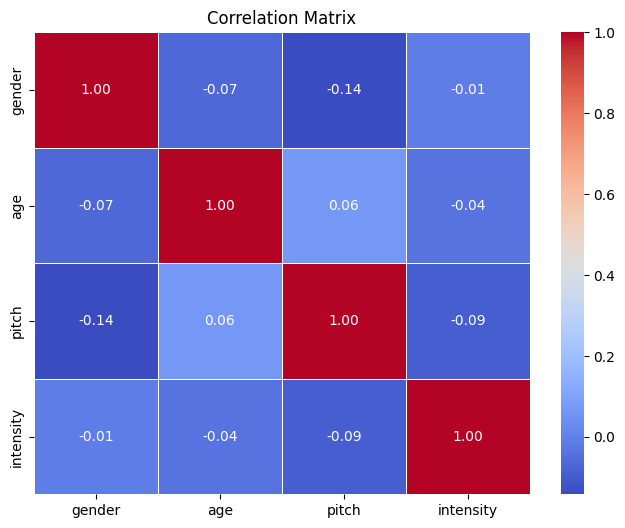

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['gender','age','pitch','intensity']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

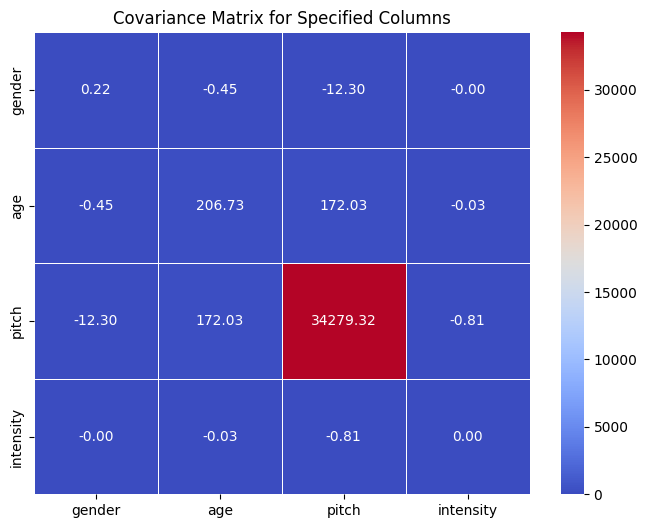

In [130]:
covariance_matrix = df[['gender','age','pitch','intensity']].cov()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Covariance Matrix for Specified Columns")
plt.show()

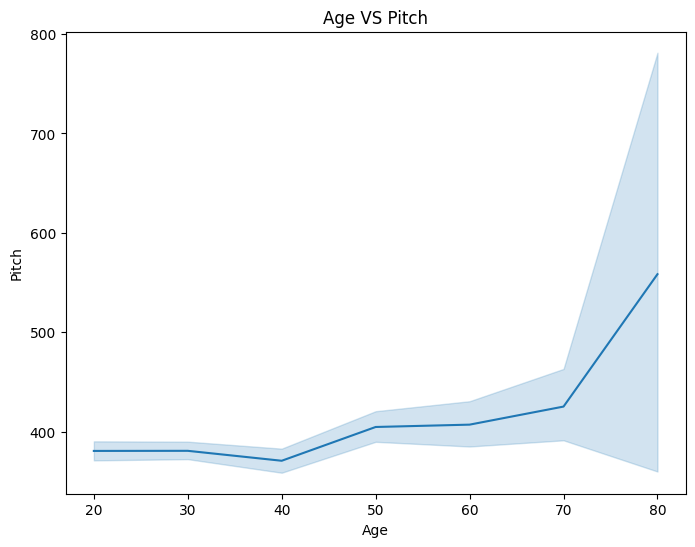

In [131]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.age, y=df.pitch, data=df)
plt.title("Age VS Pitch")
plt.xlabel("Age")
plt.ylabel("Pitch")
plt.show()

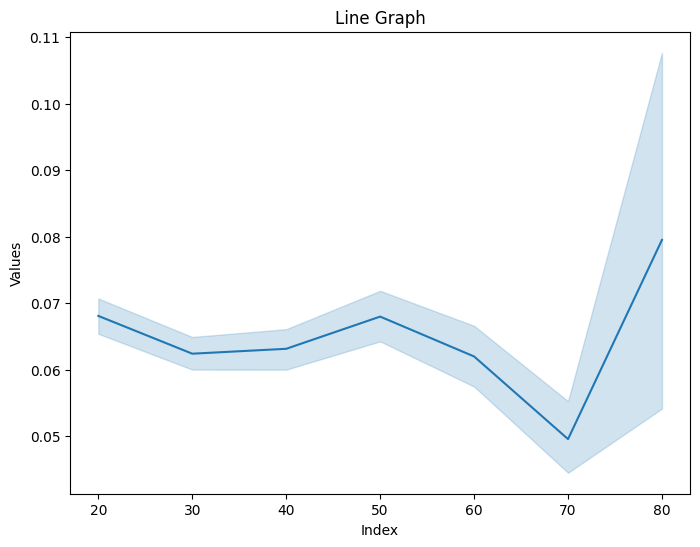

In [132]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.age, y=df.intensity, data=df)
plt.title("Line Graph")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

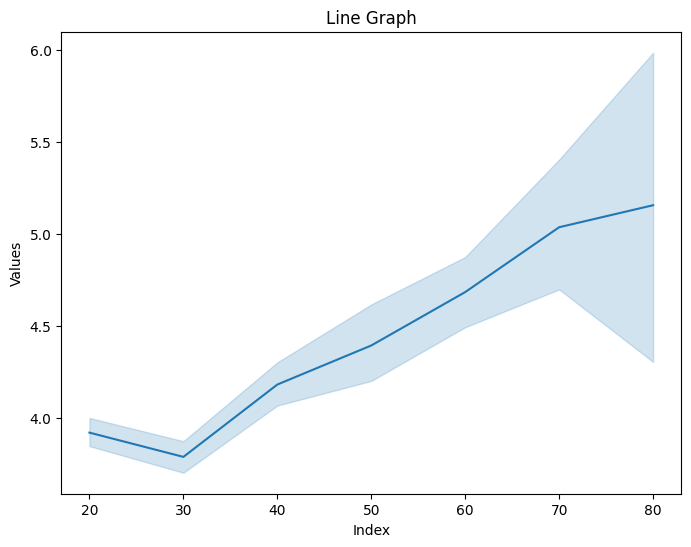

In [133]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.age, y=df.speech_durations, data=df)
plt.title("Line Graph")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

In [134]:
df['tfidf']

0       [0.3705538887121331, 0.13097805873280524, 0.31...
1       [0.10886847591930905, 0.5547223104444232, 0.35...
2       [0.24140686489574653, 0.12450105983481943, 0.2...
3       [0.1164021227278069, 0.18823899557273324, 0.16...
4       [0.2947007553800587, 0.2148489269732538, 0.262...
                              ...                        
4484    [0.3526316551136863, 0.31232840464001393, 0.08...
4485    [0.3115979227011763, 0.14726040765703416, 0.16...
4486    [0.3309965746220449, 0.4157032501584768, 0.318...
4487    [0.1280472356129131, 0.2516986628927914, 0.311...
4488    [0.46888163060194377, 0.1822095481537835, 0.14...
Name: tfidf, Length: 4489, dtype: object

In [135]:
tf=[]
for i in df['tfidf']:
  m=np.mean(i)
  tf.append(m)

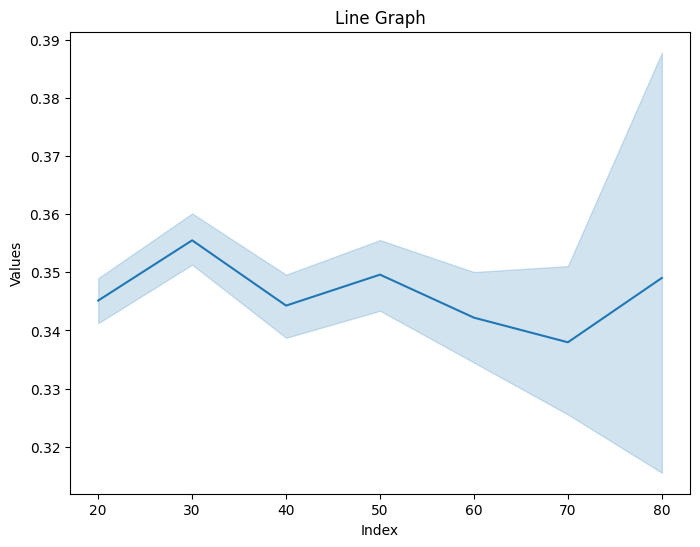

In [136]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.age, y=tf, data=df)
plt.title("Line Graph")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

In [137]:
pitch_mean = df['pitch'].mean()
pitch_std = df['pitch'].std()

# Normalize 'pitch' column
df['normalized_pitch'] = (df['pitch'] - pitch_mean) / pitch_std
df.drop(columns=['pitch'],inplace=True)

In [138]:
df

,age,gender,tfidf,intensity,speech_durations,normalized_pitch
0,20.0,1.0,"[0.3705538887121331, 0.13097805873280524, 0.31...",0.009888,5.832018,-0.736252
1,70.0,2.0,"[0.10886847591930905, 0.5547223104444232, 0.35...",0.020928,1.728027,0.584177
2,30.0,1.0,"[0.24140686489574653, 0.12450105983481943, 0.2...",0.051450,4.224036,-0.002518
3,60.0,2.0,"[0.1164021227278069, 0.18823899557273324, 0.16...",0.043960,5.376009,-0.999500
4,50.0,2.0,"[0.2947007553800587, 0.2148489269732538, 0.262...",0.054123,3.720000,-0.905145
...,...,...,...,...,...,...
4484,40.0,2.0,"[0.3526316551136863, 0.31232840464001393, 0.08...",0.021236,7.464036,-1.043224
4485,30.0,1.0,"[0.3115979227011763, 0.14726040765703416, 0.16...",0.031413,6.696009,-0.361041
4486,30.0,2.0,"[0.3309965746220449, 0.4157032501584768, 0.318...",0.102222,3.024036,-0.737453
4487,40.0,2.0,"[0.1280472356129131, 0.2516986628927914, 0.311...",0.100512,4.704036,1.103568


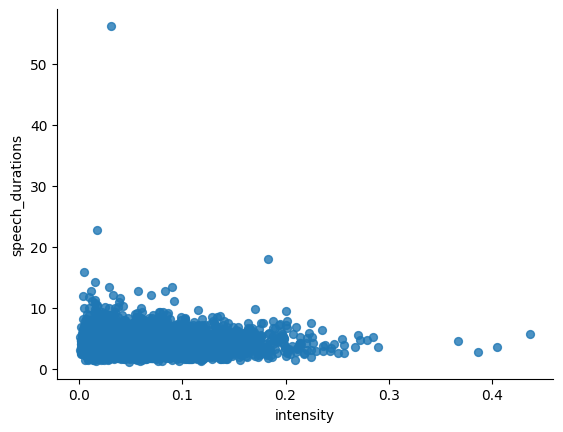

In [205]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='intensity', y='speech_durations', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

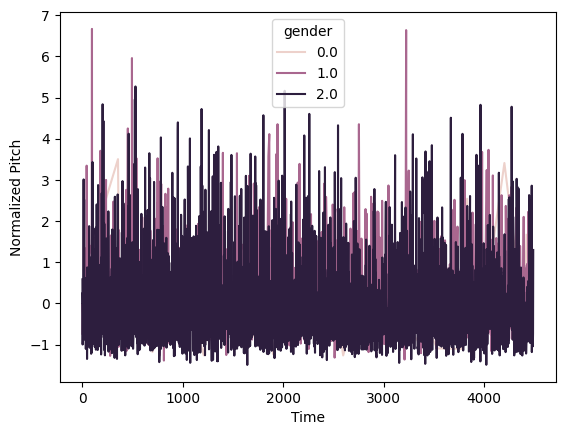

In [204]:
import matplotlib.pyplot as plt
sns.lineplot(x=range(len(df)), y='normalized_pitch', hue='gender', data=df)
plt.xlabel('Time')
_ = plt.ylabel('Normalized Pitch')

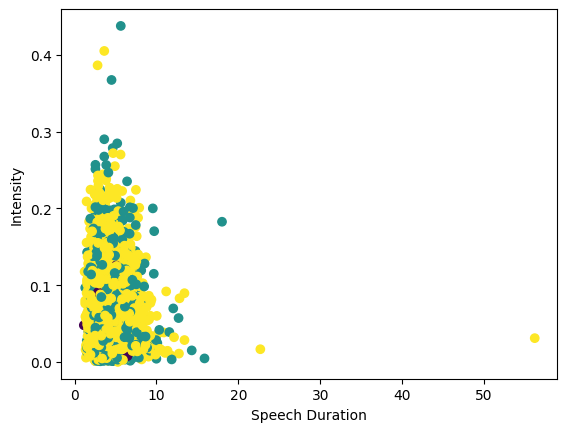

In [203]:
import matplotlib.pyplot as plt
plt.scatter(df['speech_durations'], df['intensity'], c=df['gender'])
plt.xlabel('Speech Duration')
_ = plt.ylabel('Intensity')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.theta=np.random.rand(X.shape[1]+1)

    def hypothesis(self, X,theta):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        result=np.dot(X,theta.reshape(-1,1))
        return result


    def gradient_descent(self, theta,derivative,lr):
        new_theta=theta-(lr*derivative)
        return new_theta


    def cost_function(self, Y,y_pred ):
        return np.mean(np.square(Y-y_pred))


    def derivative_costfunction(self, X,Y,theta):
        h=self.hypothesis(X,theta)
        return ((-2)*(np.mean((Y-h)*X)))



    def train(self, X, Y, lr, iterations, print_after_iteration_no):
        for i in range(0,iterations):
            y_pred=self.hypothesis(X,self.theta)   #get the y_predicted value from teh theta
            MSE_value=self.cost_function(Y,y_pred)  #calculate cost funcction using originak y and y_pred
            derivative_values=self.derivative_costfunction(X,Y,self.theta)  #calculating derivatives
            self.theta=self.gradient_descent(self.theta,derivative_values,lr)  # gradient descent function to get new theta

            if i % print_after_iteration_no == 0:
                print(f"Iteration {i}, Loss: {self.loss}")

            #stopping criteria
            if np.linalg.norm(theta, ord=2)<0.1:
                break

        return self.theta

    # test function
    def predict(self, X_test):
        predictions = self.hypothesis(X_test, self.theta)
        return predictions

    # from this we will we able to know the final weights
    def final_weights(self):
        return self.theta


In [226]:
Y=df['age'].values

In [224]:
tfidf_data=df['tfidf']
max_length = max(len(lst) for lst in tfidf_data)
padded_data = [lst + [0] * (max_length - len(lst)) for lst in tfidf_data]
df['tfidf_padded']=padded_data
df['tfidf_padded']=np.vstack(df['tfidf_padded'].values)
X=df[['gender', 'mfcc','tfidf_padded', 'intensity', 'speech_durations', 'normalized_pitch']].values


# Add bias term to features
X_train_bias = np.c_[np.ones((X.shape[0], 1)), X]


# Create an instance of the LinearRegression class
model = LinearRegression()


model.train(X_train_bias, Y, alpha=0.01, max_iterations=100000, print_interval=100)


Iteration 0, Loss: 2079.8119494428074
Iteration 100, Loss: 54.39346554025121
Iteration 200, Loss: 22.227455228851845
Iteration 300, Loss: 19.566111590844336
Iteration 400, Loss: 18.448093215933135
Iteration 500, Loss: 17.50289484312774
Iteration 600, Loss: 16.630929738036507
Iteration 700, Loss: 15.811633531207471
Iteration 800, Loss: 15.036484015016265
Iteration 900, Loss: 14.300961445563008
Iteration 1000, Loss: 13.602173715359374
Iteration 1100, Loss: 12.937935805387095
Iteration 1200, Loss: 12.306397782066785
Iteration 1300, Loss: 11.705892399344823
Iteration 1400, Loss: 11.134871306872535
Iteration 1500, Loss: 10.591877103522954
Iteration 1600, Loss: 10.075529955960704
Iteration 1700, Loss: 9.584520194835997
Iteration 1800, Loss: 9.117603420252712
Iteration 1900, Loss: 8.673596712906171
Iteration 2000, Loss: 8.251375380222749
Iteration 2100, Loss: 7.849870002981996
Iteration 2200, Loss: 7.468063683680375
Iteration 2300, Loss: 7.104989452861799
Iteration 2400, Loss: 6.7597278119992

In [232]:
X_test=df_test[[ 'mfcc','tfidf_padded', 'intensity', 'speech_durations', 'normalized_pitch']].values
predictions = model.predict(X_test)
predictions_val = [["{:.10f}".format(val) for val in sublist] for sublist in predictions]
print("Predictions:")
print(predictions_val)

Predictions:
[['39.0306617478'], ['31.6718287747'], ['36.5323198016'], ['35.1816358351'], ['33.7293448546'], ['36.4309664710'], ['33.9892219671'], ['36.9527443980'], ['33.4891621467'], ['35.2305456696'], ['40.1497259101'], ['34.5749766030'], ['44.1197747982'], ['38.8856637533'], ['34.4683477441'], ['38.0086534919'], ['33.7958589177'], ['31.0450081464'], ['38.2295250586'], ['38.4672778680'], ['33.6348961623'], ['34.9507743866'], ['35.0610880369'], ['39.6309426645'], ['39.8264188742'], ['34.2181313636'], ['33.7912450307'], ['39.1177981751'], ['33.4701932475'], ['35.2677659761'], ['38.7989193202'], ['33.9064161155'], ['34.7212676110'], ['34.0180004392'], ['34.7080274889'], ['35.1556094567'], ['38.8303559981'], ['39.1496308599'], ['33.6044662431'], ['33.3626457256'], ['36.5991633285'], ['36.3397954316'], ['32.4273309052'], ['40.2609046793'], ['33.9764713153'], ['36.4587883912'], ['34.6664747292'], ['30.8533763446'], ['32.3378200085'], ['33.8159921662'], ['35.0900883618'], ['34.6444575294']

In [201]:
Y

array([20., 70., 30., ..., 30., 40., 20.])

In [229]:
mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.004614640048079914
R-squared: 0.9999865853486974
